All import

In [1]:
import librosa as lb
import librosa.display as display
import librosa.effects as effects
import numpy as np
import csv as csv
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio

from hmmlearn import hmm
from collections import Counter

import sys
n_cluster = 1000

defining pre_processing

In [2]:

def pre_processing(path):
  #load
  audio, sr = lb.load(path = path, mono = True)

  #pre-emp
  pre_emp_audio = effects.preemphasis(audio, 0.97)


  #removing silence in audio
  clips = effects.split(pre_emp_audio, top_db=25)
  silenced=[]
  for c in clips:
    data = audio[c[0]: c[1]]
    silenced.extend(data)

  silence = np.array(silenced)



  return silence, sr

EXAMPLE_PATH = "/home/axel1143/Scrivania/Voxceleb_wav/wav/id10261/1suWlhhvRcs/00011.wav"
BASE_TRAINING_PATH="C:\\Users\\alexp\\Desktop\\Voxceleb_wav\\wav\\"
#BASE_TRAINING_PATH="/home/axel1143/Scrivania/Voxceleb_wav/wav/"
BASE_PATH = "C:\\Users\\alexp\\Desktop\\Voxceleb_mat\\"
#BASE_PATH = "/home/alex/Scrivania/Voxceleb_mat/"

**(example)** calculating mfcc, delta, delta2

In [ ]:
processed_audio, sr = pre_processing(EXAMPLE_PATH)
print(len(processed_audio)/sr)
mfcc = lb.feature.mfcc(y = processed_audio, sr = sr, n_mfcc = 13)
mfcc_delta = lb.feature.delta(mfcc)
mfcc_delta2 = lb.feature.delta(mfcc, order = 2)

Audio(processed_audio, rate = sr)



**(example)** show mfcc, delta & delta2

In [ ]:
fig, ax = plt.subplots(nrows =3, sharex =True)

img_mfcc = display.specshow(mfcc, ax=ax[0])

img_delta = display.specshow(mfcc_delta, ax=ax[1])

img_delta2 = display.specshow(mfcc_delta2, ax=ax[2])



**(example)** single execution example

In [ ]:
row_csv = []
row_csv.append("id11")
row_csv.append("pathblablabla")
print(row_csv)
for row in mfcc:
  row_csv_2 = []
  for value in row:
    row_csv_2.append(value)
  row_csv.append(row_csv_2)

for row in mfcc_delta:
  row_csv_2 = []
  for value in row:
    row_csv_2.append(value)
  row_csv.append(row_csv_2)

for row in mfcc_delta2:
  row_csv_2 = []
  for value in row:
    row_csv_2.append(value)
  row_csv.append(row_csv_2)

header = ["id","path",
          "mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13",
          "delta1","delta2","delta3","delta4","delta5","delta6","delta7","delta8","delta9","delta10","delta11","delta12","delta13",
          "delta2_1","delta2_2","delta2_3","delta2_4","delta2_5","delta2_6","delta2_7","delta2_8","delta2_9","delta2_10","delta2_11","delta2_12","delta2_13"]

with open("/content/drive/MyDrive/DATASET_VOXCELEB_1/file.csv", "w", encoding="UTF-8", newline="") as cs:
  writer = csv.writer(cs)
  writer.writerow(header)
  writer.writerow(row_csv)



**creating** csv


In [1]:
header = ["id","path",
          "mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13",
          "delta1","delta2","delta3","delta4","delta5","delta6","delta7","delta8","delta9","delta10","delta11","delta12","delta13", 
          "delta2_1","delta2_2","delta2_3","delta2_4","delta2_5","delta2_6","delta2_7","delta2_8","delta2_9","delta2_10","delta2_11","delta2_12","delta2_13"]

counter_speaker = 0
final_matrix = []

for dir in os.listdir(BASE_TRAINING_PATH):
    if counter_speaker < 300:
        counter_speaker+=1
        count_audio = 0
        for dir1 in os.listdir(BASE_TRAINING_PATH+dir):
            if count_audio < 40:
                for file in os.listdir(BASE_TRAINING_PATH+dir+"/"+dir1):
                  if count_audio < 40:
                      if not os.path.isdir(BASE_TRAINING_PATH+dir+"/"+dir1+"/"+file):
                        count_audio +=1
                        COMPLETE_PATH = BASE_TRAINING_PATH+dir+"/"+dir1+"/"+file
                        processed_audio, sr = pre_processing(COMPLETE_PATH)

                        #mfcc = get_mfcc_coefficient(processed_audio, rs) #my mfcc
                        mfcc = lb.feature.mfcc(y = processed_audio, sr = sr, n_mfcc=13)
                        mfcc_delta = lb.feature.delta(mfcc)
                        mfcc_delta2 = lb.feature.delta(mfcc, order=2)

                        row_csv = []
                        row_csv.append(dir)
                        row_csv.append(COMPLETE_PATH)


                        for row in mfcc:
                          row_csv_2 = []
                          for value in row:
                            row_csv_2.append(value)
                          row_csv.append(row_csv_2)

                        for row in mfcc_delta:
                          row_csv_2 = []
                          for value in row:
                            row_csv_2.append(value)
                          row_csv.append(row_csv_2)

                        for row in mfcc_delta2:
                          row_csv_2 = []
                          for value in row:
                            row_csv_2.append(value)
                          row_csv.append(row_csv_2)

                        final_matrix.append(row_csv)
                        print("audio n°", count_audio, "done")
    else:
        continue

df = pd.DataFrame(np.array(final_matrix))
df.columns = header
df.to_csv(BASE_PATH + "featuring_extraction.csv" )

NameError: name 'os' is not defined

loading df, creating mfcc/delta matrix

In [2]:
df = pd.read_csv(BASE_PATH + "featuring_extraction.csv")

features_mfcc = ["mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10", "mfcc11",
            "mfcc12", "mfcc13"]

labels = df.loc[:, ["id"]].values #labael dataset
features_mfcc_values = df.loc[:, features_mfcc].values #mfcc dataset

total = features_mfcc_values.shape[0] * features_mfcc_values.shape[1]
counter = 0
correct_dataset_mfcc = []
header = []
final_matrix = []
frames = []

for i in range(features_mfcc_values.shape[0]): #row_dataset.append(labels[i])
    correct_dataset_mfcc = []
    for j in range(features_mfcc_values.shape[1]):
        row_dataset = []
        features_mfcc_values[i][j] = features_mfcc_values[i][j].split()
        for k in range(len(features_mfcc_values[i][j])):
            features_mfcc_values[i][j][k] = features_mfcc_values[i][j][k].replace("[", "")
            features_mfcc_values[i][j][k] = features_mfcc_values[i][j][k].replace("]", "")
            features_mfcc_values[i][j][k] = features_mfcc_values[i][j][k].replace(",", "")
        for ele in features_mfcc_values[i][j]:
            if ele == "":
                features_mfcc_values[i][j].remove(ele)
        for k in range(len(features_mfcc_values[i][j])):
            features_mfcc_values[i][j][k] = float(features_mfcc_values[i][j][k])
            row_dataset.append(features_mfcc_values[i][j][k])
        correct_dataset_mfcc.append(row_dataset)
    counter += 1

    transposed = np.array(correct_dataset_mfcc).transpose()
    frames.append(transposed.shape[0])
    for row in transposed:
        final_matrix.append(row)

    print(counter, "/", features_mfcc_values.shape[0])


pd.DataFrame(final_matrix).to_csv(BASE_PATH + "preparing_csv_mfcc.csv", header=None, index=None)
pd.DataFrame(frames).to_csv(BASE_PATH + "frame_size_mfcc.csv", header=None, index=None)

NameError: name 'pd' is not defined

In [3]:
## Creating delta matrix
df = pd.read_csv(BASE_PATH + "featuring_extraction.csv")

features_delta = ["delta1", "delta2", "delta3", "delta4", "delta5", "delta6", "delta7", "delta8", "delta9", "delta10", "delta11",
            "delta12", "delta13"]

labels = df.loc[:, ["id"]].values #labael dataset
features_delta_values = df.loc[:, features_delta].values #mfcc dataset

total = features_delta_values.shape[0] * features_delta_values.shape[1]
counter = 0
correct_dataset_mfcc = []
header = []
final_matrix = []
frames = []

for i in range(features_delta_values.shape[0]): #row_dataset.append(labels[i])
    correct_dataset_mfcc = []
    for j in range(features_delta_values.shape[1]):
        row_dataset = []
        features_delta_values[i][j] = features_delta_values[i][j].split()
        for k in range(len(features_delta_values[i][j])):
            features_delta_values[i][j][k] = features_delta_values[i][j][k].replace("[", "")
            features_delta_values[i][j][k] = features_delta_values[i][j][k].replace("]", "")
            features_delta_values[i][j][k] = features_delta_values[i][j][k].replace(",", "")
        for ele in features_delta_values[i][j]:
            if ele == "":
                features_delta_values[i][j].remove(ele)
        for k in range(len(features_delta_values[i][j])):
            features_delta_values[i][j][k] = float(features_delta_values[i][j][k])
            row_dataset.append(features_delta_values[i][j][k])
        correct_dataset_mfcc.append(row_dataset)
    counter += 1

    transposed = np.array(correct_dataset_mfcc).transpose()
    frames.append(transposed.shape[0])
    for row in transposed:
        final_matrix.append(row)

    print(counter, "/", features_delta_values.shape[0])


pd.DataFrame(final_matrix).to_csv(BASE_PATH + "preparing_csv_delta.csv", header=None, index=None)
pd.DataFrame(frames).to_csv(BASE_PATH + "frame_size_delta.csv", header=None, index=None)

NameError: name 'pd' is not defined

vector quantization con kmeans

In [4]:
from sklearn.cluster import KMeans

mfcc = np.array(pd.read_csv(BASE_PATH + "preparing_csv_mfcc.csv", header=None))

model = KMeans(n_clusters=n_cluster)
model.fit(mfcc)

print(model.labels_)
print(len(model.labels_))

labels = model.labels_

pd.DataFrame(labels).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\labels_quantization.csv", header=None, index=None)

NameError: name 'np' is not defined

In [5]:
from sklearn.cluster import KMeans

mfcc = np.array(pd.read_csv(BASE_PATH + "preparing_csv_delta.csv", header=None))

model = KMeans(n_clusters=n_cluster)
model.fit(mfcc)

print(model.labels_)
print(len(model.labels_))

labels = model.labels_

pd.DataFrame(labels).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\labels_quantization_delta.csv", header=None, index=None)

NameError: name 'np' is not defined

test set & train set (mfcc)

In [6]:
frames = np.array(pd.read_csv(BASE_PATH + "frame_size_mfcc.csv", header= None)).reshape((1, -1))
labels = np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\labels_quantization_mfcc.csv", header=None)).reshape((1, -1))

frames = np.array(frames[0])
labels = np.array(labels[0])
vector_complete = []

prec = 0

for index in frames:
    vector_complete.append(labels[prec:prec+index])
    prec += index

vector_complete = np.array(pd.DataFrame(vector_complete))

index = 0
for row in vector_complete:
    row_counter = 0
    for i in range(len(row)):
        if np.isnan(row[i]):
            row[i] = row[row_counter]
            row_counter+=1
    index += 1
    #print(index)
print(vector_complete)

pd.DataFrame(vector_complete).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\matrix_quantization_filled.csv")


NameError: name 'np' is not defined

In [ ]:
observations = np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\matrix_quantization_filled.csv"))
observations = np.delete(observations, 0, axis=1)

index = 0
train_set = []
test_set = []
for row in observations:
    if 0 <= index <= 34:
        train_set.append(row)
        index+=1
    elif index <= 38:
        test_set.append(row)
        index+=1
    elif index == 39:
        test_set.append(row)
        index = 0

test_set = np.array(test_set)
train_set = np.array(train_set)


pd.DataFrame(train_set).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\train_set_hmm.csv")
pd.DataFrame(test_set).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\test_set_hmm.csv")

train & test set (delta)

In [7]:
frames = np.array(pd.read_csv(BASE_PATH + "frame_size_delta.csv", header= None)).reshape((1, -1))
labels = np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\labels_quantization_delta.csv", header=None)).reshape((1, -1))

frames = np.array(frames[0])
labels = np.array(labels[0])
vector_complete = []

prec = 0

for index in frames:
    vector_complete.append(labels[prec:prec+index])
    prec += index

vector_complete = np.array(pd.DataFrame(vector_complete))

index = 0
for row in vector_complete:
    row_counter = 0
    for i in range(len(row)):
        if np.isnan(row[i]):
            row[i] = row[row_counter]
            row_counter+=1
    index += 1
    #print(index)
print(vector_complete)

pd.DataFrame(vector_complete).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\matrix_quantization_filled_delta.csv")


NameError: name 'np' is not defined

In [8]:
observations = np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\matrix_quantization_filled_delta.csv"))
observations = np.delete(observations, 0, axis=1)

index = 0
train_set = []
test_set = []
for row in observations:
    if 0 <= index <= 34:
        train_set.append(row)
        index+=1
    elif index <= 38:
        test_set.append(row)
        index+=1
    elif index == 39:
        test_set.append(row)
        index = 0

test_set = np.array(test_set)
train_set = np.array(train_set)


pd.DataFrame(train_set).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\train_set_hmm_delta.csv")
pd.DataFrame(test_set).to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\test_set_hmm_delta.csv")

NameError: name 'np' is not defined

prediction with personal hmm

In [9]:
quantization_matrix = pd.read_csv(BASE_PATH +"k" + str(n_cluster)+ "\\mfcc\\train_set_hmm_mfcc.csv")
quantization_matrix = np.array(quantization_matrix, dtype=int)
quantization_matrix = np.delete(quantization_matrix, 0, 1)

## building transition matrix
for person in range(300):
    starting_matrix = np.zeros((n_cluster,))
    observation_matrix = np.zeros((n_cluster, n_cluster))

    for audio_person in range(35):

        actual_audio = quantization_matrix[person*35 + audio_person]
        for frame in range(2806-1):

            if frame == 0:
                starting_matrix[actual_audio[frame]] +=1/35

            observation_matrix[actual_audio[frame]][actual_audio[frame+1]] += 1

    for row in observation_matrix:
        sum_row = sum(row)
        for col in range(len(row)):
            row[col] = row[col] / sum_row


    observation_matrix = pd.DataFrame(observation_matrix).fillna(0)
    observation_matrix.to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\matrix\\quan_mat_" + str(person) +".csv", header=None, index=None)
    starting_matrix = pd.DataFrame(starting_matrix).fillna(0)
    starting_matrix.to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\matrix\\start_mat_" + str(person) +".csv", header=None, index=None)

NameError: name 'pd' is not defined

In [6]:
quantization_matrix = pd.read_csv(BASE_PATH +"k" + str(n_cluster)+ "\\delta\\train_set_hmm_delta.csv")
quantization_matrix = np.array(quantization_matrix, dtype=int)
quantization_matrix = np.delete(quantization_matrix, 0, 1)

## building transition matrix
for person in range(300):
    starting_matrix = np.zeros((n_cluster,))
    observation_matrix = np.zeros((n_cluster, n_cluster))

    for audio_person in range(35):

        actual_audio = quantization_matrix[person*35 + audio_person]
        for frame in range(2806-1):

            if frame == 0:
                starting_matrix[actual_audio[frame]] +=1/35

            observation_matrix[actual_audio[frame]][actual_audio[frame+1]] += 1

    for row in observation_matrix:
        sum_row = sum(row)
        for col in range(len(row)):
            row[col] = row[col] / sum_row


    observation_matrix = pd.DataFrame(observation_matrix).fillna(0)
    observation_matrix.to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\matrix\\quan_mat_" + str(person) +".csv", header=None, index=None)
    starting_matrix = pd.DataFrame(starting_matrix).fillna(0)
    starting_matrix.to_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\matrix\\start_mat_" + str(person) +".csv", header=None, index=None)

C:\Users\alexp\AppData\Local\Temp\ipykernel_37056\4009770760.py:23: RuntimeWarning: invalid value encountered in double_scalars
  row[col] = row[col] / sum_row


In [10]:
## Compute likehood
import warnings
#warnings.filterwarnings("ignore")

def find_probability(obsservation_matrix, starting_matrix, sequence, ac_frame):
    prob = 1
    for i in range(len(sequence)-1):
        if ac_frame == 0:
            starting_prob = starting_matrix[sequence[0]]
            if starting_prob == 0:
                starting_prob = 1/len(sequence) #0.001
            prob = prob * starting_prob

        mov_prov = obsservation_matrix[sequence[i]][sequence[i+1]]
        if mov_prov == 0:
            mov_prov = 1/obsservation_matrix.shape[0]# 0.0001
        prob = prob * mov_prov

    return np.log(prob)



value_nspeaker = []
for person in [2, 3, 5, 10, 50]:
    #print(person)
    mean = []

    for shift in range(0, 300-person, person):
        correct_label = []
        for i in range(person):
            for j in range(5):
                correct_label.append(i)

        matrix = []
        starting_matrix = []

        matrix_delta = []
        starting_matrix_delta = []

        actual = 0
        for i in range(shift, shift+person):
            matrix.append(np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\matrix\\quan_mat_"+str(i) + ".csv", header=None), dtype=float))
            starting_matrix.append(np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\mfcc\\matrix\\start_mat_"+str(+i)+".csv", header=None), dtype=float))

        test_set_mfcc = np.array(pd.read_csv(BASE_PATH +"k" + str(n_cluster)+ "\\mfcc\\test_set_hmm_mfcc.csv"), dtype=int)
        test_set_mfcc = np.delete(test_set_mfcc, 0, axis=1)

        for i in range(shift, shift+person):
            matrix_delta.append(np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\matrix\\quan_mat_"+str(i) + ".csv", header=None), dtype=float))
            starting_matrix_delta.append(np.array(pd.read_csv(BASE_PATH + "k" + str(n_cluster)+ "\\delta\\matrix\\start_mat_"+str(+i)+".csv", header=None), dtype=float))

        test_set_delta = np.array(pd.read_csv(BASE_PATH +"k" + str(n_cluster)+ "\\delta\\test_set_hmm_delta.csv"), dtype=int)
        test_set_delta = np.delete(test_set_delta, 0, axis=1)


        corrected = 0
        test_set_frames_mfcc = test_set_mfcc[shift*5: (shift*5)+5*person]
        test_set_frames_delta = test_set_delta[shift*5: (shift*5)+5*person]

        for audio in range(5*person):
            sum_prediction = []
            current = 0
            for frame in range(1,100):
                scores_mfcc = []
                scores_delta = []

                for n_model in range(person):
                    scores_mfcc.append(find_probability(matrix[n_model], starting_matrix[n_model],test_set_frames_mfcc[audio][current:frame*20], current))

                for n_model in range(person):
                    scores_delta.append(find_probability(matrix_delta[n_model], starting_matrix_delta[n_model], test_set_frames_delta[audio][current:frame*20], current))

                predict_mfcc = max(scores_mfcc)
                predict_delta = max(scores_delta)

                index_best_mfcc = scores_mfcc.index(predict_mfcc)
                index_best_delta = scores_delta.index(predict_delta)

                sum_prediction.append(index_best_mfcc)
                sum_prediction.append(index_best_delta)

                current+=20

            occurrence = Counter(sum_prediction)
            if correct_label[audio] == occurrence.most_common(1)[0][0]: corrected+=1
        mean.append(corrected/(5*person))
        #print(corrected/(5*person))


    print("n_person = ", person," sequence = ", mean," max = ", max(mean)," mean = ", np.mean(mean))
    value_nspeaker.append(np.mean(mean))

print(value_nspeaker)

NameError: name 'np' is not defined

prediction with hmm libreria

In [101]:
quantization_matrix = pd.read_csv(BASE_PATH +"k200\\train_set_hmm.csv")
quantization_matrix = np.array(quantization_matrix, dtype=int)
quantization_matrix = np.delete(quantization_matrix, 0, 1)

test_set = np.array(pd.read_csv(BASE_PATH +"k200\\test_set_hmm.csv"), dtype=int)
test_set = np.delete(test_set, 0, axis=1)

n_states = 6
matrix = []
actual = 0

correct_label = []
for i in range(10):
    for j in range(5):
        correct_label.append(i)

for person in range(10):
    train_set = quantization_matrix[actual: actual +35]
    model = hmm.MultinomialHMM(n_components=n_states)
    model.fit(train_set)
    matrix.append(model)
    actual+=35


In [103]:
person = 3
corrected = 0
test_set_frames = test_set[0: 5*person]
for audio in range(5*person):
    sum_prediction = []
    current = 0
    for frame in range(1,100):
        scores = []

        for n_model in range(person):
            try:
                array = [test_set_frames[audio][current:frame*20]]
                #print(array)
                score = matrix[n_model].score(array)
            except IndexError:
                score = float("-inf")
            scores.append(score)

        current+=20
        predict = max(scores)
        index_best = scores.index(predict)
        sum_prediction.append(index_best)


    occurrence = Counter(sum_prediction)


    if correct_label[audio] == occurrence.most_common(1)[0][0]: corrected+=1

print(corrected/(5*person))

0.8


prediction with knn

(105, 2)
(15, 2)
[0.95238095 0.71428571]
[0.26666667 0.71428571]
[0.95238095 0.71428571]
[0.26666667 0.33333333]


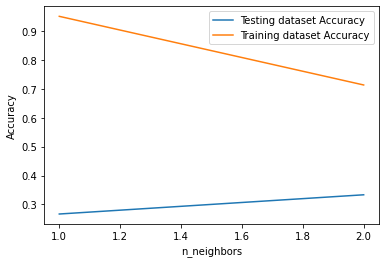

In [17]:
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt
#
# person = 3
#
# X_train = train_set[: person*35, :2]
# print(X_train.shape)
# X_test = test_set[:person*5, :2]
# print(X_test.shape)
#
# y_train = []
# for i in range(person):
#     for j in range(35):
#         y_train.append(i)
#
# y_test = []
# for i in range(person):
#     for j in range(5):
#         y_test.append(i)
#
#
# # Split into training and test set
# neighbors = np.arange(1, person)
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))
#
# # Loop over K values
# for i, k in enumerate(neighbors):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#
#     # Compute training and test data accuracy
#     train_accuracy[i] = knn.score(X_train, y_train)
#     test_accuracy[i] = knn.score(X_test, y_test)
#     print(train_accuracy)
#     print(test_accuracy)
#
# # Generate plot
# plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
#
# plt.legend()
# plt.xlabel('n_neighbors')
# plt.ylabel('Accuracy')
# plt.show()